In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [25]:
X, y, coef = make_regression(n_samples=100, n_features=1, noise=5, random_state=42, coef=True)

In [26]:
coef

array(41.74110031)

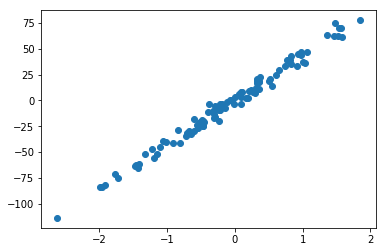

In [14]:
plt.scatter(X, y)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

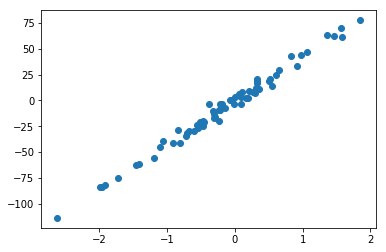

In [18]:
plt.scatter(X_train, y_train)

In [20]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
model.coef_, model.intercept_

(array([42.84588804]), -0.26194113093984495)

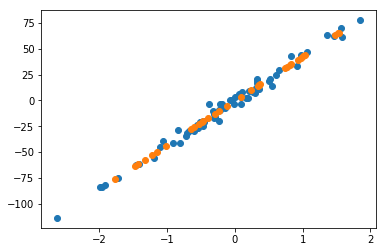

In [27]:
plt.scatter(X_train, y_train)

plt.scatter(X_test, model.predict(X_test))

In [44]:
class LinearRegCustom:
    
    def __init__(self, lr=.01, max_iters=20):
        self.lr = lr
        self.max_iters = max_iters
        
        
    def fit(self, X, y):
        
        self.coef_ = np.random.random()
        self.intercept_ = np.random.random()
        
        errs = []
        for i in range(self.max_iters):
            self.gradient_decend(X, y)
            errs.append(self.error(X, y))
        
        return errs
            
    
    def gradient_decend(self, X, y):
        delta_coef, delta_inter = self.gradient(X, y)
        
        self.coef_ += delta_coef
        self.intercept_ += delta_inter
        
    def gradient(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.predict(X)
        e = yh - ya
        
        de2m = np.mean(e * X)
        de2c = np.mean(e * 1)
        
        return -de2m*self.lr, -de2c*self.lr
    
    def error(self, X, y):
        ya = y.reshape(-1, 1)
        yh = self.predict(X)
        e = yh - ya
        return np.mean(e**2)
        
    
    def predict(self, X):
        return self.coef_ * X + self.intercept_

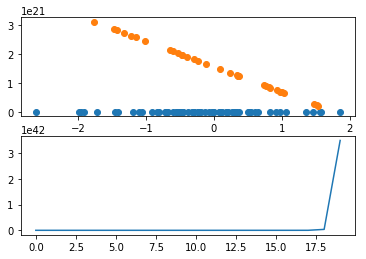

In [53]:
m2 = LinearRegCustom(lr=.)

errors = m2.fit(X_train, y_train)

plt.figure()
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_train)
plt.scatter(X_test, m2.predict(X_test))
plt.subplot(2, 1, 2)
plt.plot(errors)
plt.show()

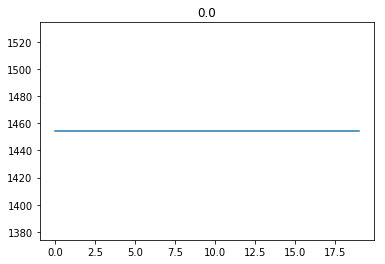

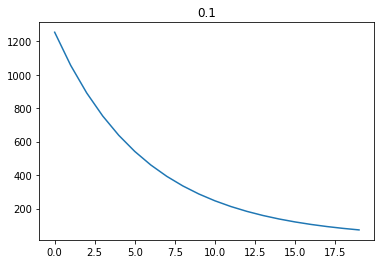

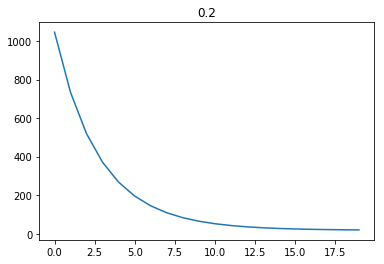

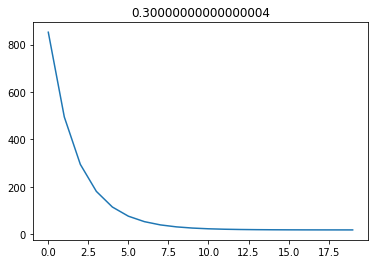

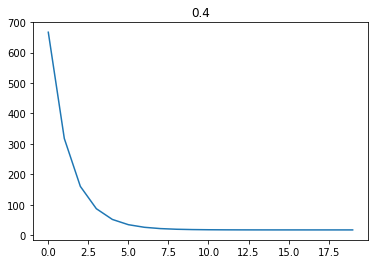

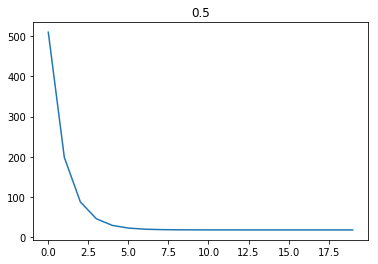

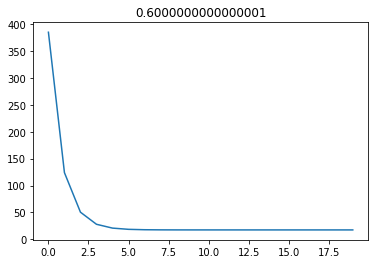

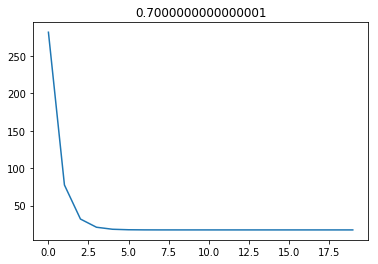

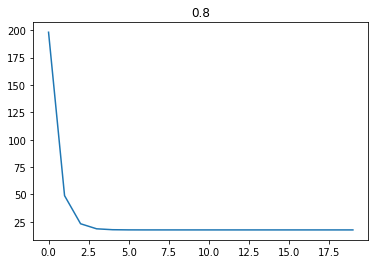

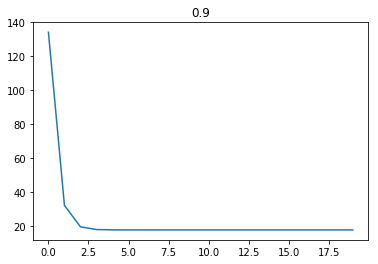

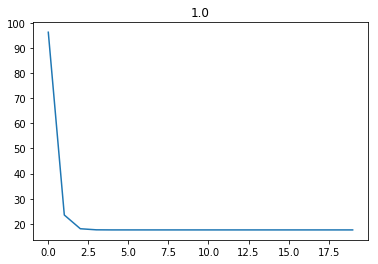

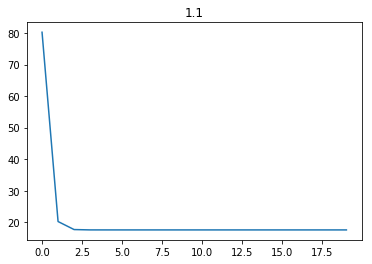

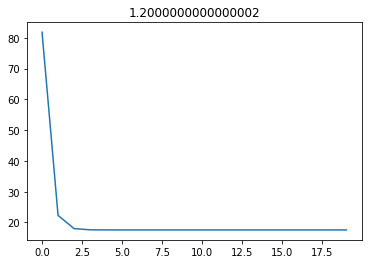

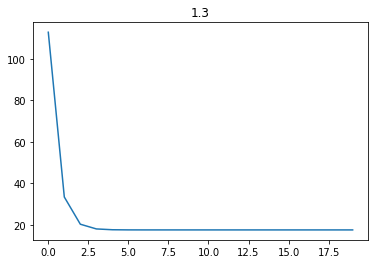

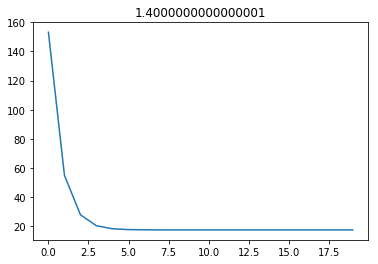

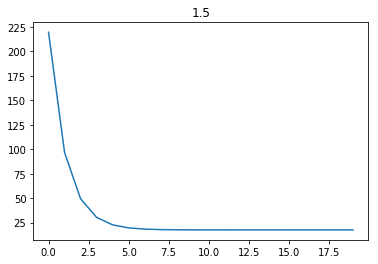

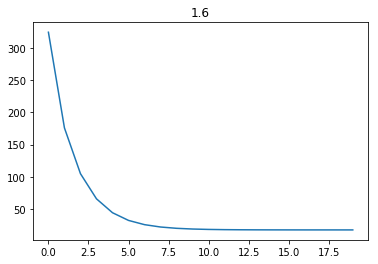

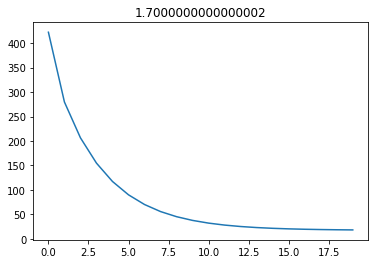

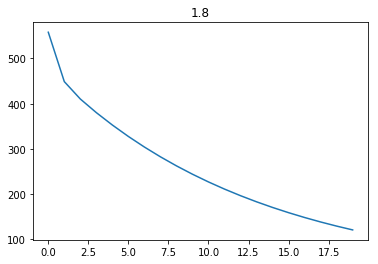

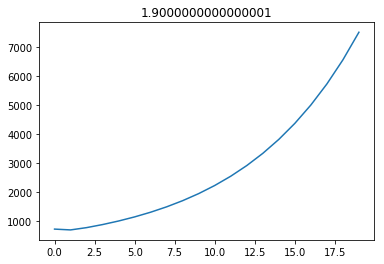

In [52]:

for i in range(20):
    lr = .1 * i
    m2 = LinearRegCustom(lr=lr)
    errors = m2.fit(X_train, y_train)
    plt.figure()
    plt.title(str(lr))
    plt.plot(errors)
    plt.show()